In [3]:
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import math
import logging
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from collections import Counter
import os
import csv
import xgboost as xgb
import logging
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
logging.getLogger().setLevel(logging.INFO)

In [6]:
def MAPE(true, pred):
    """
    计算相对百分比误差
    :param true, pred:
    :return:
    """
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)

def load(path):
    """
    导入数据
    :param path:
    :return:
    """
    data = pd.read_csv(path, header=None)
    return np.array(data)

def build_model():
    """
    建立模型
    :return:
    """
    model = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
    return model

20.0
MAPE: 0.4556773860885533


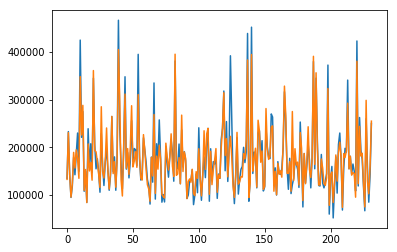

In [7]:
def run():
    """读取配置文件"""
    config_path = "/Users/haoran/Documents/BUAA_course/matchine_learnign/final_work/personal_work/predict_price/" \
                  "config/config.json"
    config = json.load(open(config_path))
    """导入训练数据，验证数据，测试数据"""
    x_train = load(config["x_train"])
    y_train = load(config["y_train"])
    x_test = load(config["x_test"])
    y_test = load(config["y_test"])
    test = load(config["final_test_data"])

    print(x_train[0,0])


    """建立模型，并训练"""
    model = build_model()
    model.fit(x_train, y_train)
    """用训练好的模型验证"""
    pred = model.predict(x_test)
    mape = MAPE(y_test, pred)
    print("MAPE:", mape)

    plt.plot(y_test)
    plt.plot(pred)
    plt.show()

run()